## 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

### Hints: 使用 [Request](https://blog.gtwang.org/programming/python-requests-module-tutorial/) 抓取資料
### Hints: [字串分割](http://www.runoob.com/python/att-string-split.html)
### Hints: 例外處理: [Try-Except](https://pydoing.blogspot.com/2011/01/python-try.html)

# [作業目標]
- 試著讀取網頁上的圖片連結清單, 再以清單中網址讀取圖片

# [作業重點]
- 從網頁上讀取連結清單 (In[1], In[2])
- 從清單網址讀取圖片 (In[6]~In[9], Out[6]~Out[9])

In [108]:
## 假如我們不想把資料載到自己的電腦裡?
# 把連結填入
target_url = "https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt"

In [109]:
import requests
response = requests.get(target_url)
data= response.text

# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))
data[0:100]

784594


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2'

In [110]:
# 找到換行符號，用該符號做字串分割後，把它拿掉
#使用 \t,\\ 替換成空格
split_tag="\n"

data= data.split(split_tag)
print(len(data))
data[0]

9996


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg'

## 將 txt 轉成 pandas dataframe

In [111]:
import pandas as pd

arrange_data=data

df = pd.DataFrame(arrange_data)
a=df.loc[0]

## 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

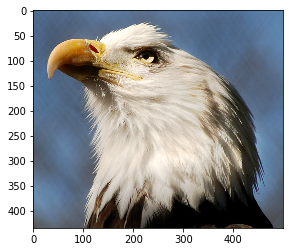

In [112]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt


#請用 df.loc[...] 得到第一筆資料的連結



def split_data(data):
    name=[]
    url=[]
    for i in data:
        name.append(i.split("\t")[0])
        try:    
            url.append(i.split("\t")[1])
        except :
            url.append("")
    data_dict = {'name': name,
                'url':url}
    return data_dict
            
data=split_data(data)
df_data=pd.DataFrame(data)
df_data.head()

first_link=df_data.loc[0][1]
response=requests.get(first_link)
img = Image.open(BytesIO(response.content))
plt.imshow(img)
plt.show()



In [114]:
def img2arr_fromURLs(url_list, resize = False):
    url_list=[]
    for url in url_list:
        response=requests.get(url)
        try:
            img=Image.open(BytesIO(response.content))
        except:
            pass
        else:
            img_list.append(img)
        return img_list

In [116]:
result = img2arr_fromURLs(df_data["url"][0:5])
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

for im_get in result:
    plt.imshow(im_get)
    plt.show()

TypeError: object of type 'NoneType' has no len()

In [22]:
#Day05_1 HW 

import pandas as pd
import numpy as np #陣列
import random

Country=["Taiwan","Japan","Spanish","USA","Korea"]
Population=[random.randint(1,5000000) for _ in range(5)]


data1= {'國家':Country,'人口':Population}


data1= pd.DataFrame(data)
print(data)


Max=max(data1["國家"])
print(Max)

        國家       人口
0   Taiwan  2702634
1    Japan   512698
2  Spanish  1098346
3      USA  3532802
4    Korea  1948629
USA
